In [1]:
import numpy as np
import pandas as pd
import glob
import os

import warnings
warnings.filterwarnings( "ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import tifffile as tf

from scipy import ndimage

import citrus_utils as vitaminC

In [2]:
tissue_src = '../preproc/tissue/'
bnames = [os.path.split(x)[-1] for x in sorted(glob.glob(tissue_src + 'SR*'))]
for i in range(len(bnames)):
    print(i, '\t', bnames[i])

0 	 SR01_CRC3289_12B-19-9
1 	 SR02_CRC0628_12B-18-5
2 	 SR03_CRC3611_12B-20-11
3 	 SR04_CRC2717_12B-40-1


In [23]:
footpoints = 'geocentric'
oil_src = '../preproc/oil/'
oil_dst = '../preproc/glands/'
bname = bnames[0]
L = 2

lname = 'L{:02d}'.format(L)
src = oil_src + bname + '/' + lname + '/' 

savefig = True
dst = '../preproc/spine/'

spinename = tissue_src + bname + '/' + lname + '/' + bname + '_' + lname + '_spine.tif'
exoname = tissue_src + bname + '/' + lname + '/' + bname + '_' + lname + '_exocarp.tif'
print(spinename)
filename = tissue_src + bname + '/' + lname + '/' + bname + '_' + lname + '_vh_alignment.csv'

../preproc/tissue/SR01_CRC3289_12B-19-9/L02/SR01_CRC3289_12B-19-9_L02_spine.tif


In [4]:
exo = tf.imread(exoname)
spine = tf.imread(spinename)
scoords = np.asarray(np.nonzero(spine))

In [12]:
sz = 11
espine = ndimage.grey_erosion(spine, size=(sz,sz,sz))

In [13]:
tspine = vitaminC.get_largest_element(espine)

113 components
[1926506    3509    2594     879     526     247     102      66      61
      57      47      40      25      14      11       8       7       4
       3       3]


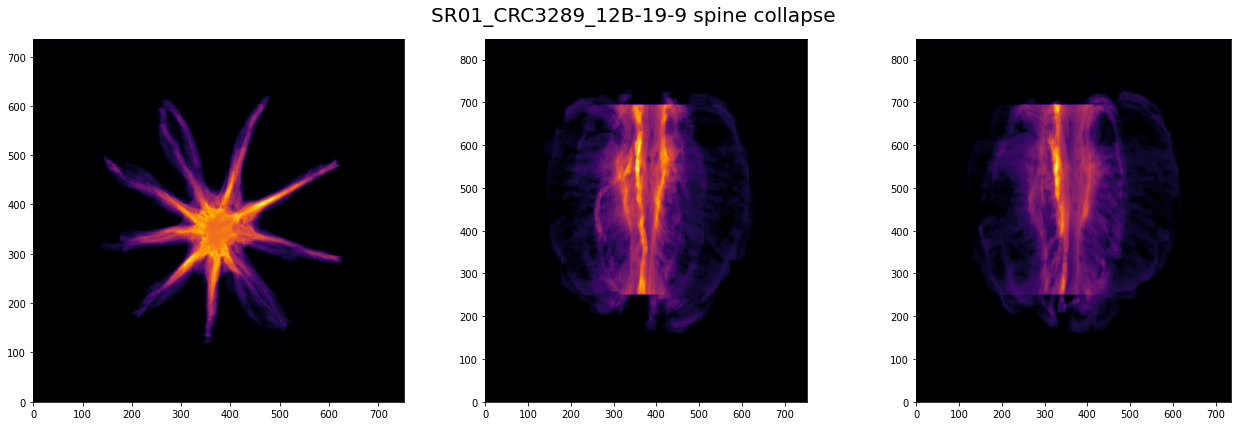

In [15]:
snaps = vitaminC.collapse_dimensions(spine)
vitaminC.plot_collapse_dimensions(snaps, bname, 'spine')

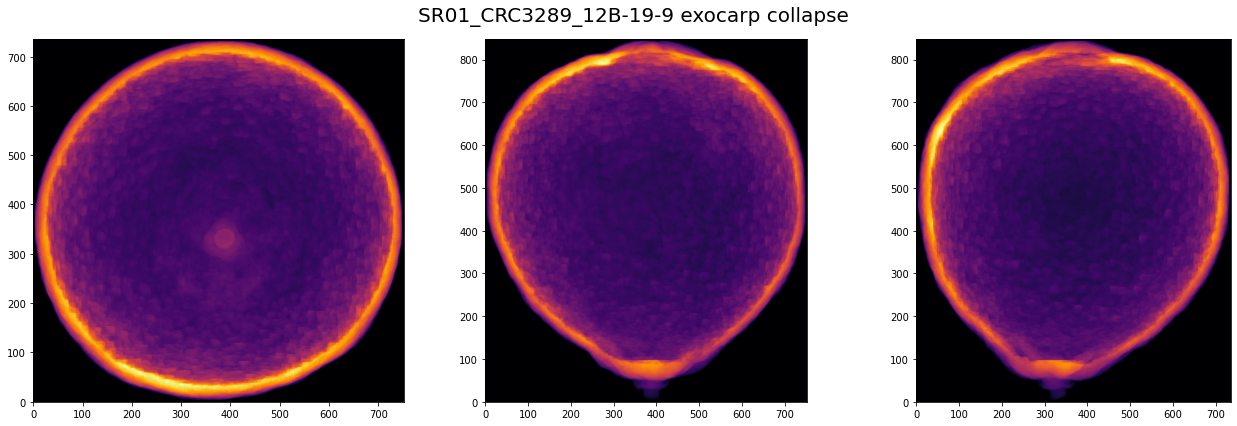

In [16]:
snaps = vitaminC.collapse_dimensions(exo)
vitaminC.plot_collapse_dimensions(snaps, bname, 'exocarp')

In [81]:
spine = tf.imread(spinename)
spine = spine[:, 250:375, 200:400].copy()
#spine[:, :, :300] = 0
#spine[:, :, 500:] = 0
#spine[:, 450:, :] = 0

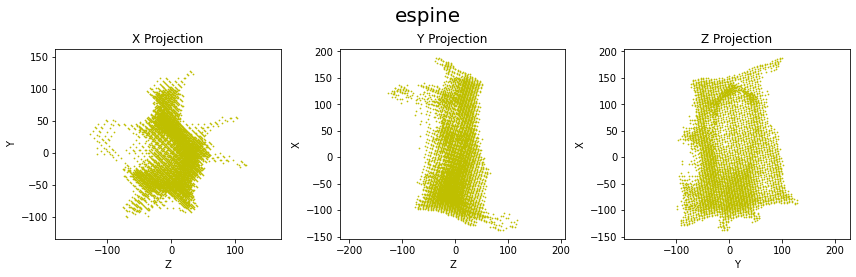

In [15]:
vh = vitaminC.spine_based_alignment(tspine, 'espine', savefig=False, dst=dst)

In [ ]:
if False:
    spine = tf.imread(spinename)
    title = bname + '_' + lname + ' spine aligned'
    vh = vitaminC.spine_based_alignment(spine, title, savefig=False, dst=dst)
    np.savetxt(filename, vh, delimiter=',')

In [17]:
filename = src + bname + '_glands.tif'
img = tf.imread(filename)

rotateby = [2,1,0]
centers = np.asarray(np.nonzero(img))

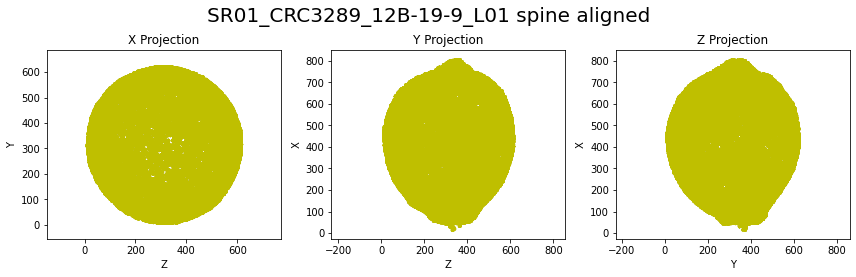

In [18]:
title = bname + '_' + lname + ' spine aligned'
vitaminC.plot_3Dprojections(centers.T, title=title, writefig=False, dst=dst)

In [188]:
vh = np.eye(img.ndim)
vh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
if False:
    glands = np.matmul(centers.T, np.transpose(vh))
    centerby = np.mean(glands, axis = 0)
    scaleby = .5*np.std(glands[:,0])
    glands = (glands - centerby)/scaleby
    cglands = (glands.T)[rotateby]
    ccglands = cglands.copy()

    title = bname + '_' + lname + ' aligned glands'

    vitaminC.plot_3Dprojections(glands, title=title, writefig=savefig, dst=dst)

In [24]:
filename = tissue_src + bname + '/' + lname + '/' + bname + '_' + lname + '_vh_alignment.csv'
vh = np.loadtxt(filename, delimiter=',')
vh

array([[ 0.9738332 , -0.0198302 ,  0.22639715],
       [ 0.2047685 ,  0.50869309, -0.83624231],
       [ 0.09858381, -0.86071953, -0.49944282]])

In [ ]:
if False:
    glands = np.matmul(centers.T, np.transpose(vh))
    centerby = np.mean(glands, axis = 0)
    scaleby = .5*np.std(glands[:,0])

    glands = (glands - centerby)/scaleby

    title = bname + '_' + lname + ' aligned glands'
    vitaminC.plot_3Dprojections(glands, title=title, writefig=False, dst=dst)

In [25]:
vh[0] = -vh[0]

In [ ]:
rotation = np.zeros((3,3))
#rotation[0,0] = 1; rotation[1,2] = -1; rotation[2,1]= 1
rotation[1,1] = 1; rotation[0,2] = -1; rotation[2,0]= 1
#rotation[2,2] = 1; rotation[0,1] = -1; rotation[1,0]=1

vhh = rotation @ vh
#vhh[0] = -vhh[0]

In [21]:
sscords = np.asarray(np.nonzero(tspine))

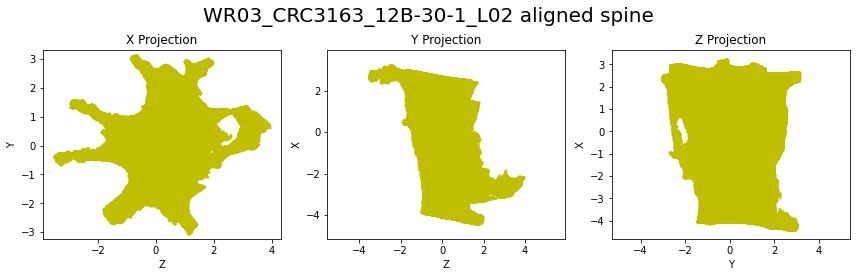

In [22]:
glands = np.matmul(sscords.T, np.transpose(vh))
centerby = np.mean(glands, axis = 0)
scaleby = .5*np.std(glands[:,0])

glands = (glands - centerby)/scaleby

title = bname + '_' + lname + ' aligned spine'
vitaminC.plot_3Dprojections(glands, title=title, writefig=False, dst=dst)

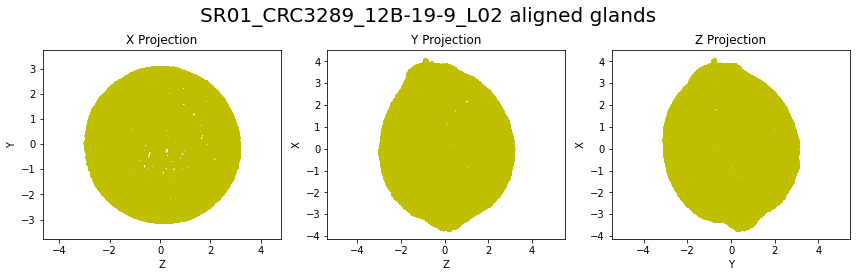

In [26]:
glands = np.matmul(centers.T, np.transpose(vh))
centerby = np.mean(glands, axis = 0)
scaleby = .5*np.std(glands[:,0])

glands = (glands - centerby)/scaleby

title = bname + '_' + lname + ' aligned glands'
vitaminC.plot_3Dprojections(glands, title=title, writefig=False, dst=dst)

In [27]:
filename = tissue_src + bname + '/' + lname + '/' + bname + '_' + lname + '_vh_alignment.csv'
title = bname + '_' + lname + ' aligned glands'
vitaminC.plot_3Dprojections(glands, title=title, writefig=True, dst=dst)
np.savetxt(filename, vh, delimiter=',')